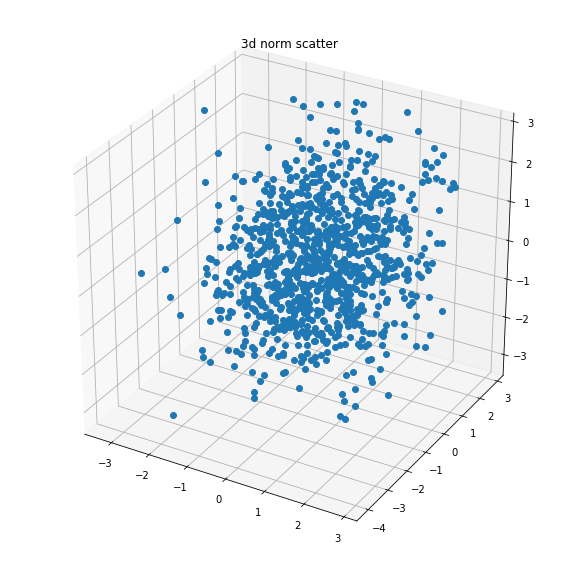

In [21]:
#三次元正規分布のサンプリング
#提案分布g(x)が詳細釣り合いを満たす場合(正規分布)を用いる

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from scipy.stats import norm,uniform,multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

N_sample = 1000
cov1_2 = 0.3
cov2_3 = 0.5
cov3_1 = 0
sigma = np.array([[1,cov1_2,cov3_1],[cov1_2,1,cov2_3],[cov3_1,cov2_3,1]])
sigma_inv = np.linalg.inv(sigma)
x = []
y = []
z = []

def P(X):
    global sigma_inv
    x = np.array(X)
    return np.exp((-0.5)*np.dot(np.dot(x,sigma_inv),x))

def update(X):
    ret = [0]*3
    for i in range(3):
        ret[i] = X[i] + float(norm.rvs(loc=0.0,scale=2.0))
    return ret

cur_x = [0.0,0.0,0.0]
#burn in 
for i in range(10):
    next_x = update(cur_x)
    r = P(next_x) / P(cur_x)
    if uniform.rvs(loc=0,scale=1.0) < r:
        cur_x = next_x
        
cnt = 0
while cnt < N_sample:
    next_x = update(cur_x)
    r = P(next_x) / P(cur_x)
    
    if uniform.rvs(loc=0,scale=1.0) < r:
        cur_x = next_x
        x.append(cur_x[0])
        y.append(cur_x[1])
        z.append(cur_x[2])
        cnt += 1
        
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('3d norm scatter')
ax.plot(x,y,z,'o')
